<a href="https://colab.research.google.com/github/ArvinAz/Python/blob/main/HW11datasetb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This data set shows the amount of calories, protein, fat, sodium etc, in 80 different brands of cereal.

mfr: Manufacturer of cereal

A = American Home Food Products;

G = General Mills
K = Kelloggs

N = Nabisco

P = Post

Q = Quaker Oats

R = Ralston Purina

type:cold or hot (H/C)

vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended

shelf: display shelf (1, 2, or 3, counting from the floor)

Ratings are based on Consumer Ratings

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/ArvinAz/Python/main/cereal.csv")
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [ ]:
df.isna().sum()

In [ ]:
df.isnull().sum()

In [ ]:
df.nunique()

name        77
mfr          7
type         2
calories    11
protein      6
fat          5
sodium      27
fiber       13
carbo       22
sugars      17
potass      36
vitamins     3
shelf        3
weight       7
cups        12
rating      77
dtype: int64

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [ ]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


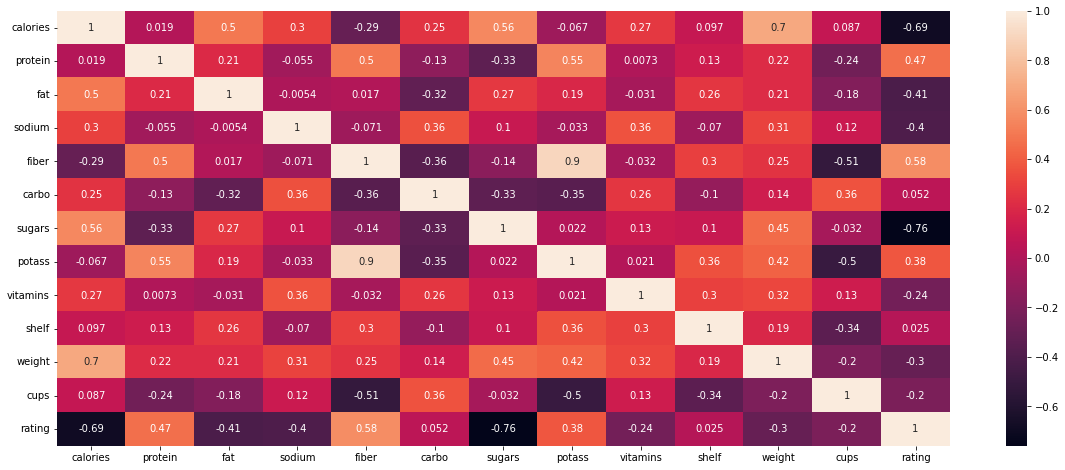

In [ ]:
corrMatrix = df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corrMatrix, annot=True)
plt.show()

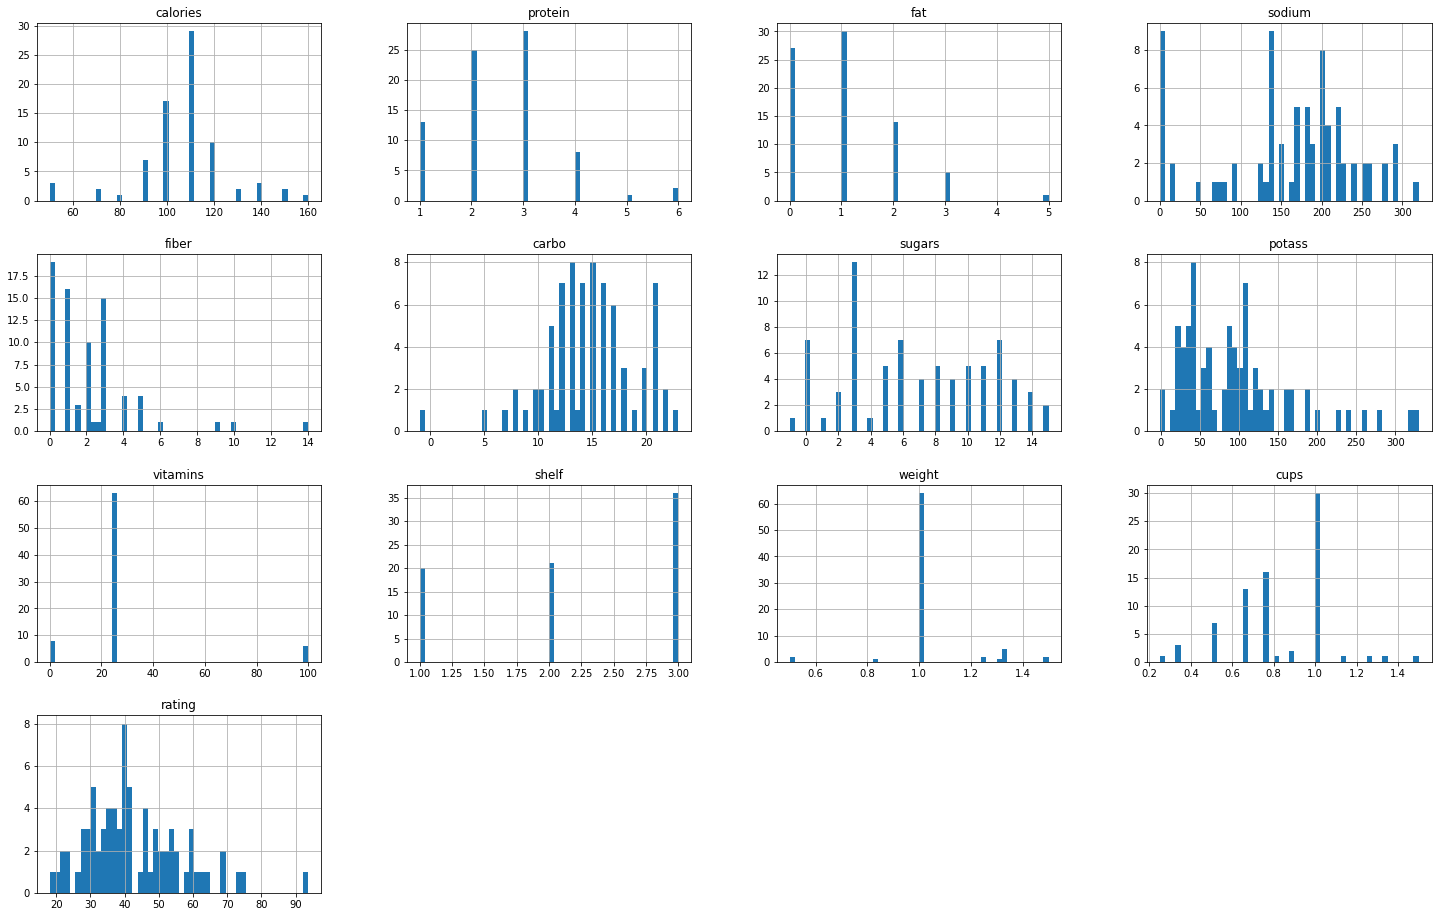

In [ ]:
#create a dataframe that just houses the numerical data
df_numerical = df.drop(['name'],axis = 1)

df_numerical.hist(bins=50, figsize=(25,16))
plt.show()

In [ ]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f597c87f710>,
      dtype=object)

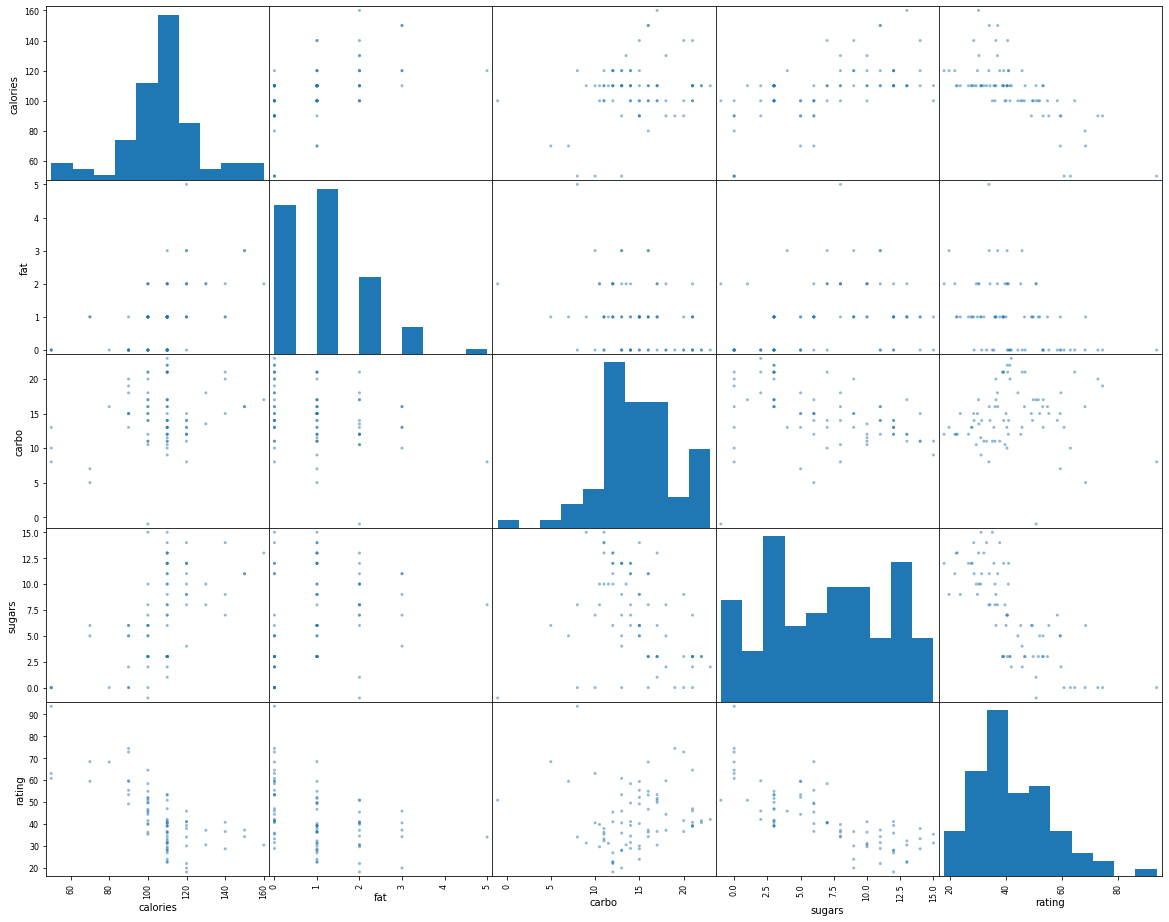

In [ ]:
 #let's now look at a few good attributes to compare
#we want to see if we are missing anything in a non-linear relationship
from pandas.plotting import scatter_matrix

 #let's now look at a few good attributes to compare
#we want to see if we are missing anything in a non-linear relationship
from pandas.plotting import scatter_matrix

attributes = ['calories', 'fat',  
       'carbo', 'sugars','rating'
       ]
scatter_matrix(df[attributes], figsize=(20, 16))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f597beb7990>,
      dtype=object)

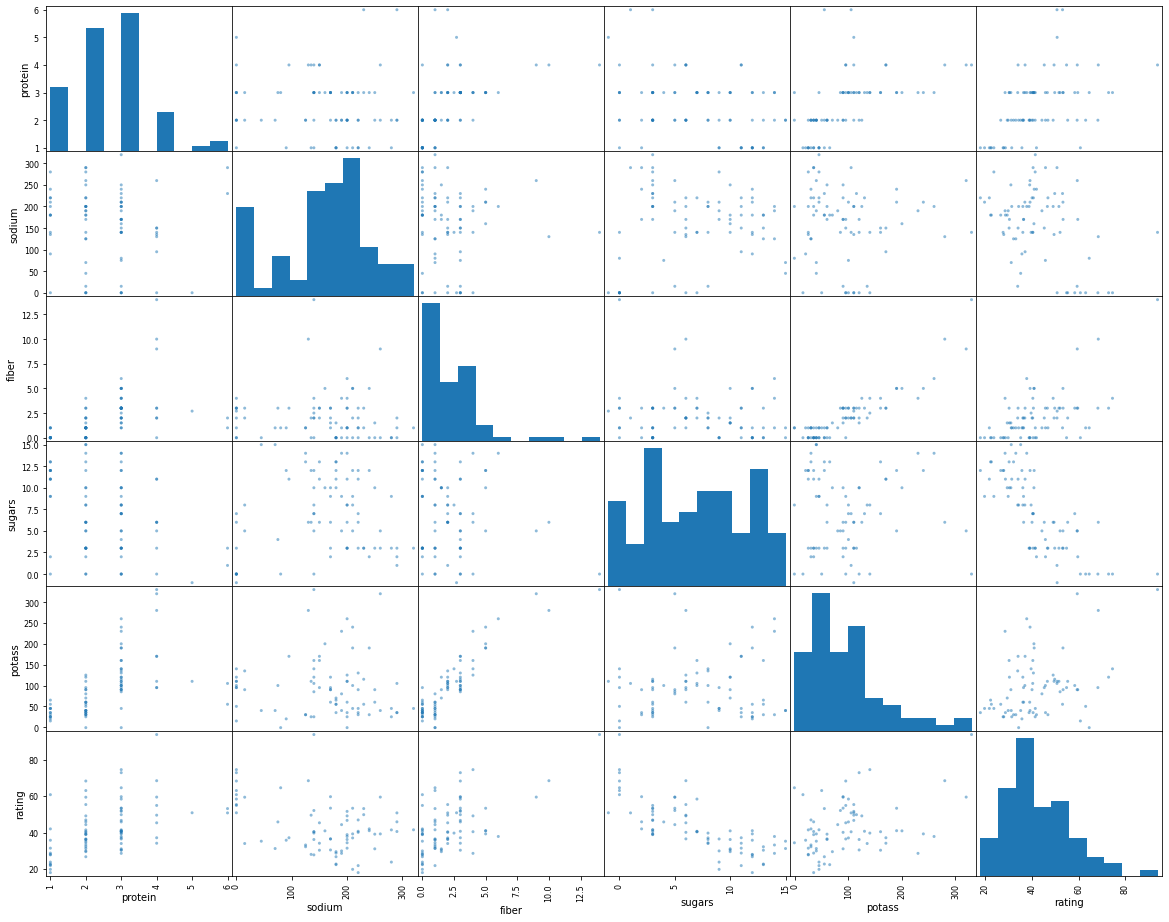

In [20]:
 #let's now look at a few good attributes to compare
#we want to see if we are missing anything in a non-linear relationship
from pandas.plotting import scatter_matrix

 #let's now look at a few good attributes to compare
#we want to see if we are missing anything in a non-linear relationship
from pandas.plotting import scatter_matrix

attributes = ['protein',  'sodium', 'fiber',
        'sugars', 'potass','rating'
       ]
scatter_matrix(df[attributes], figsize=(20, 16))

According to the scatter matrix, the cereals that are lower rated are high in sugar, carbs and calories but not much in fat. Hence why they are lower rated.